In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
advertising = pd.DataFrame(pd.read_csv("advertising.csv"))
advertising.head()

,Unnamed: 0,TV,Radio,Newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,12.0
3,4,151.5,41.3,58.5,16.5
4,5,180.8,10.8,58.4,17.9


In [4]:
advertising.tail()

,Unnamed: 0,TV,Radio,Newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,12.0
3,4,151.5,41.3,58.5,16.5
4,5,180.8,10.8,58.4,17.9


In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5 non-null      int64  
 1   TV          5 non-null      float64
 2   Radio       5 non-null      float64
 3   Newspaper   5 non-null      float64
 4   sales       5 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 332.0 bytes


In [6]:
advertising.describe()

,Unnamed: 0,TV,Radio,Newspaper,sales
count,5.000000,5.00000,5.000000,5.000000,5.000000
mean,3.000000,124.82000,35.020000,60.100000,15.780000
std,1.581139,90.77834,13.878653,9.973715,4.695423
min,1.000000,17.20000,10.800000,45.100000,10.400000
25%,2.000000,44.50000,37.800000,58.400000,12.000000
50%,3.000000,151.50000,39.300000,58.500000,16.500000
75%,4.000000,180.80000,41.300000,69.200000,17.900000
max,5.000000,230.10000,45.900000,69.300000,22.100000


In [7]:
advertising.shape

(5, 5)

In [9]:
#Data Cleaning 

In [11]:
advertising.isnull().sum()*100/advertising.shape[0]

Unnamed: 0    0.0
TV            0.0
Radio         0.0
Newspaper     0.0
sales         0.0
dtype: float64

In [12]:
print(advertising.to_string())

   Unnamed: 0     TV  Radio  Newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3   12.0
3           4  151.5   41.3       58.5   16.5
4           5  180.8   10.8       58.4   17.9


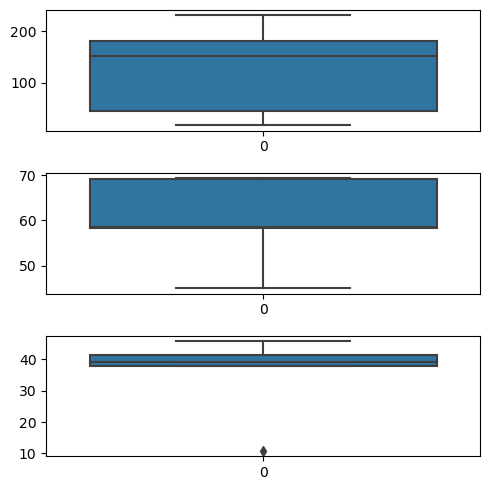

In [13]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

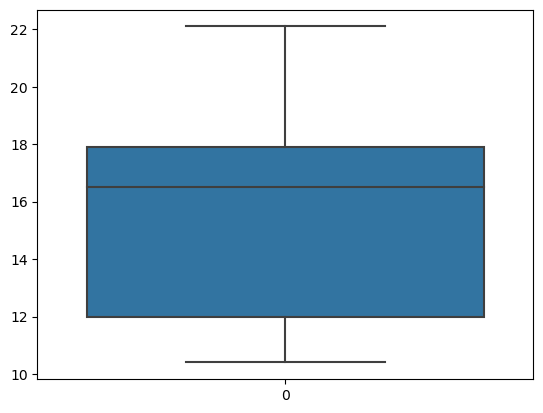

In [22]:
sns.boxplot(advertising['sales'])
plt.show()

C:\Users\A\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


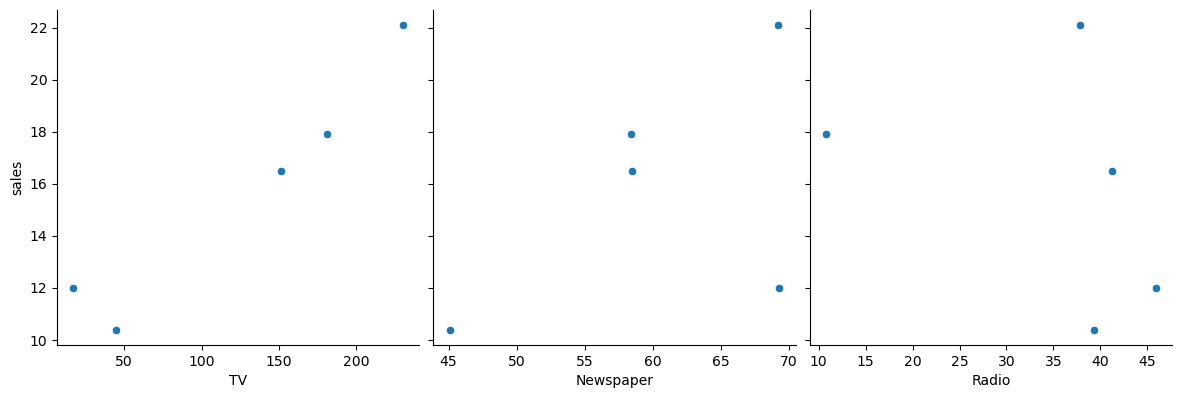

In [23]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

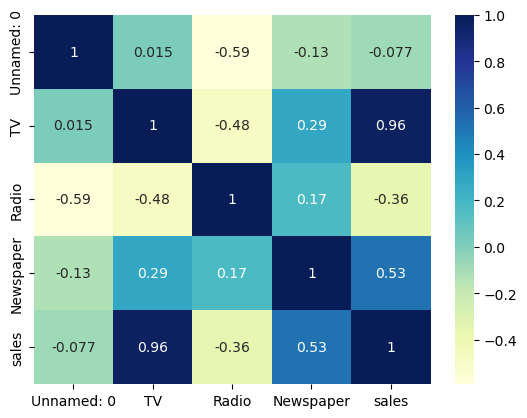

In [24]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [26]:
X = advertising['TV'].values.reshape(-1, 1)
y = advertising['sales']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 1)

In [28]:
y_train.head()

4    17.9
0    22.1
3    16.5
Name: sales, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()

In [31]:
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred=model.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 3.752590171692229
Mean Squared Error (MSE): 17.294435650166754
Root Mean Squared Error (RMSE): 4.158657914540068
R-squared (R2): -26.022555703385567
